** Loading of libraries and data **

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pixar_movies = pd.read_csv('PixarMovies.csv')


** Exploring data **

In [2]:
print(pixar_movies.dtypes)
print(pixar_movies.describe())
print(pixar_movies.head(pixar_movies.shape[0]))

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object
       Year Released      Length    RT Score  IMDB Score  Metacritic Score  \
count      15.000000   15.000000   15.000000   15.000000         15.000000   
mean     2006.066667  101.533333   89.333333    7.846667         82.800000   
std         5.933761    9.927355   16.451950    0.655599         12.119642   
min      1995.000000   81.000000   39.000000    6.300000         57.000000   
25%      2002.000000   96.000000   8

** Scaling and renaming of the IMDB Score column **

In [3]:
pixar_movies = pixar_movies.rename(columns = {'IMDB Score':'IMDB Score (x 10)'})
pixar_movies['IMDB Score (x 10)'] = pixar_movies['IMDB Score (x 10)'] * 10

** The data about the film Inside Out is incomplete. **

In [4]:
pixar_movies = pixar_movies[pixar_movies['Movie'] != 'Inside Out']

** Domestic % International % aren't numbers yet **

In [5]:
col = 'Domestic %'
pixar_movies[col] = pixar_movies[col].apply(lambda perc : float(perc[:-1]))
col = 'International %'
pixar_movies[col] = pixar_movies[col].apply(lambda perc : float(perc[:-1]))

** Setting the movie name ('Movie') as index**

In [6]:
pixar_movies.set_index('Movie', inplace=True)

** How did the rating of Pixars movies develop over time? **

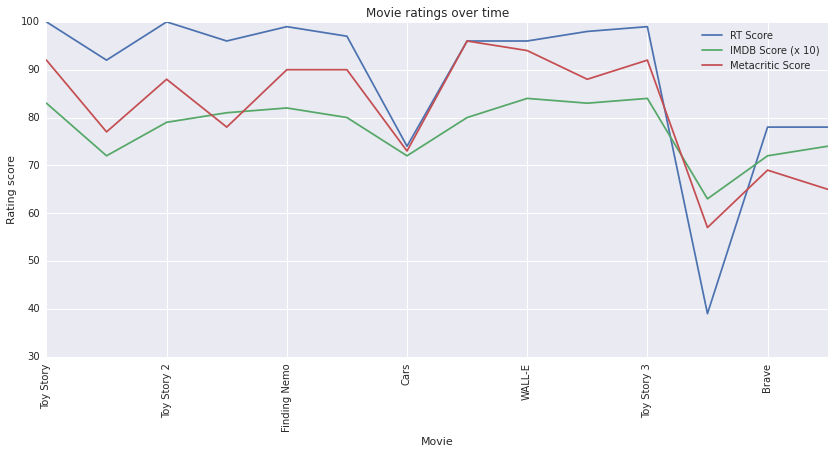

In [7]:
plt.figure()
ax = pixar_movies.loc[:,['RT Score','IMDB Score (x 10)','Metacritic Score']].plot(
    figsize=(14, 6), 
    rot=90)

plt.ylabel('Rating score')
plt.title('Movie ratings over time');

** Is there a difference between the review scores in respect to the sorces? **

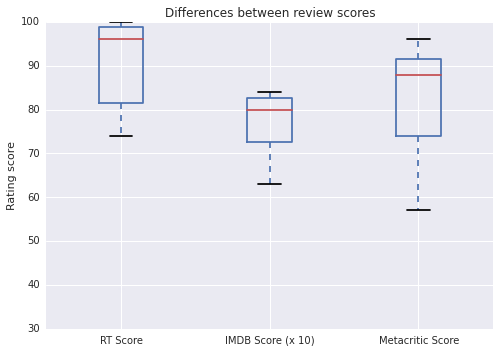

In [8]:
plt.figure()
pixar_movies.loc[:,['RT Score','IMDB Score (x 10)','Metacritic Score']].boxplot(return_type='axes')
plt.ylabel('Rating score')
plt.title('Differences between review scores');

** Did the proportion between domestic (US) and international revenue change? **

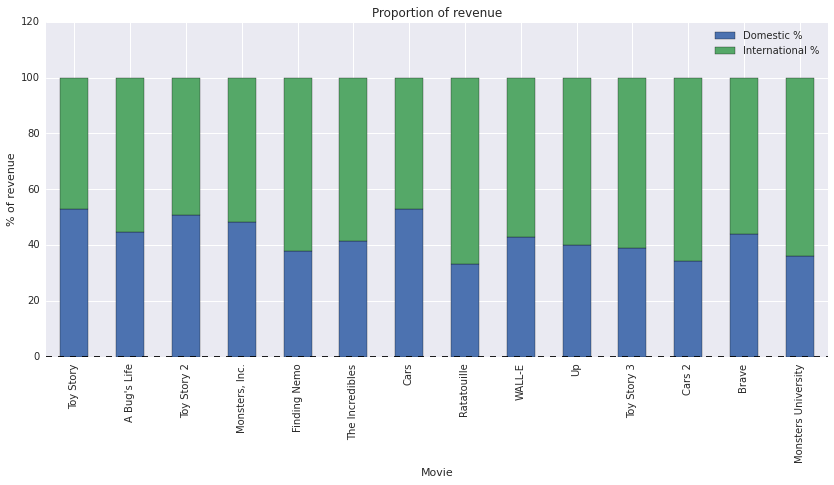

In [9]:
plt.figure()
pixar_movies.loc[:,['Domestic %','International %']].plot(kind='bar', stacked=True, figsize=(14, 6))
plt.ylabel('% of revenue')
plt.title('Proportion of revenue');